In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from env.EV_Sce_Env import EV_Sce_Env
import math
import seaborn as sns
import numpy as np

env = EV_Sce_Env('HY_2', seed=0)

In [3]:
#哈佛大学Data Science课程CS109推荐的matplotlib 默认设置
#可以方便的设置一次，保证整体风格一致
from matplotlib import rcParams
# #图片大小
# rcParams['figure.figsize'] = (10, 6)
# #图片精度
# rcParams['figure.dpi'] = 150
# #线宽
# rcParams['lines.linewidth'] = 2
#是否显示网格
rcParams['axes.grid'] = True
#axes 填充颜色为浅灰
rcParams['axes.facecolor'] = '#eeeeee'
# #字体大小为14
# rcParams['font.size'] = 14
#边框为无色
rcParams['patch.edgecolor'] = 'none'

EV

In [148]:
df_general = []
for sce in ['2P', '3P', '4P']:
    dir_ds = 'output/LS1_DS_{}'.format(sce)
    dir_de = 'output/LS1_De_{}'.format(sce)
    dir_mappo = 'output/LS1_MAPPO_{}'.format(sce)

    df_evg_ds = pd.read_csv(dir_ds+'/EV_g.csv')
    df_evg_de = pd.read_csv(dir_de+'/EV_g.csv')
    df_evg_mappo = pd.read_csv(dir_mappo+'/EV_g.csv')
    ev = list(df_evg_mappo['EV'])

    res_mappo = []
    res_ds = []
    res_de = []
    for i in range(len(ev)):
        res_mappo.append(df_evg_mappo.iloc[i]['Charging_time'] + df_evg_mappo.iloc[i]['Waiting_time'] + total_dis/100)
        res_ds.append(df_evg_ds.iloc[i]['Charging_time'] + df_evg_ds.iloc[i]['Waiting_time'] + total_dis/100)
        res_de.append(df_evg_de.iloc[i]['Charging_time'] + df_evg_de.iloc[i]['Waiting_time'] + total_dis/100)

    df_g = pd.DataFrame(columns=['EV', 'Mel', 'Travel_time', 'Sce'])
    j = 0
    for i in ev:
        df_g.loc[j] = [i, 'DS', res_ds[i], sce]
        j += 1
        df_g.loc[j] = [i, 'DE', res_de[i], sce]
        j += 1
        df_g.loc[j] = [i,'MAPPO', res_mappo[i], sce]
        j += 1
    df_general.append(df_g)
df_general = pd.concat(df_general)

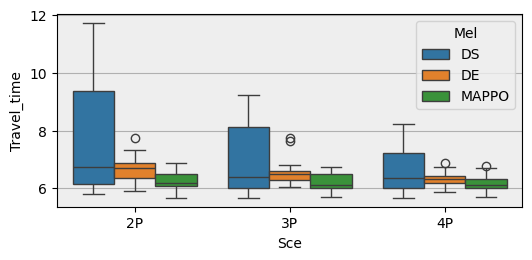

In [149]:
plt.figure(figsize=(6, 2.5))
ax = sns.boxplot(y="Travel_time", x='Sce', hue='Mel', data=df_general)
plt.savefig('Travel_time.png', dpi=300, bbox_inches='tight')

In [150]:
df_general = []
for sce in ['2P', '3P', '4P']:
    dir_ds = 'output/LS1_DS_{}'.format(sce)
    dir_de = 'output/LS1_De_{}'.format(sce)
    dir_mappo = 'output/LS1_MAPPO_{}'.format(sce)

    df_evg_ds = pd.read_csv(dir_ds+'/EV_g.csv')
    df_evg_de = pd.read_csv(dir_de+'/EV_g.csv')
    df_evg_mappo = pd.read_csv(dir_mappo+'/EV_g.csv')
    ev = list(df_evg_mappo['EV'])

    res_mappo = []
    res_ds = []
    res_de = []
    for i in range(len(ev)):
        res_mappo.append(df_evg_mappo.iloc[i]['Charging_time'] + df_evg_mappo.iloc[i]['Waiting_time'] - env.agents[i].ideal_charging_time)
        res_ds.append(df_evg_ds.iloc[i]['Charging_time'] + df_evg_ds.iloc[i]['Waiting_time'] - env.agents[i].ideal_charging_time)
        res_de.append(df_evg_de.iloc[i]['Charging_time'] + df_evg_de.iloc[i]['Waiting_time'] - env.agents[i].ideal_charging_time)

    df_g = pd.DataFrame(columns=['EV', 'Mel', 'Residual', 'Sce'])
    j = 0
    for i in ev:
        df_g.loc[j] = [i, 'DS', res_ds[i], sce]
        j += 1
        df_g.loc[j] = [i, 'DE', res_de[i], sce]
        j += 1
        df_g.loc[j] = [i,'MAPPO', res_mappo[i], sce]
        j += 1
    df_general.append(df_g)
df_general = pd.concat(df_general)

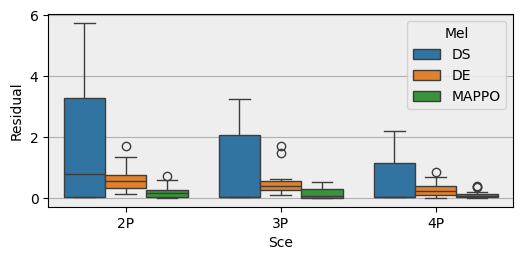

In [151]:
plt.figure(figsize=(6, 2.5))
ax = sns.boxplot(y="Residual", x='Sce', hue='Mel', data=df_general)
plt.savefig('Residual.png', dpi=300, bbox_inches='tight')

In [152]:
df_waiting_charging = []
for sce in ['2P', '3P', '4P']:
    dir_ds = 'output/LS1_DS_{}'.format(sce)
    dir_de = 'output/LS1_De_{}'.format(sce)
    dir_mappo = 'output/LS1_MAPPO_{}'.format(sce)

    df_evg_ds = pd.read_csv(dir_ds+'/EV_g.csv')
    df_evg_de = pd.read_csv(dir_de+'/EV_g.csv')
    df_evg_mappo = pd.read_csv(dir_mappo+'/EV_g.csv')
    ev = list(df_evg_mappo['EV'])

    ct_mappo = df_evg_mappo['Charging_time'].mean()
    ct_ds = df_evg_ds['Charging_time'].mean()
    ct_de = df_evg_de['Charging_time'].mean()
    
    wt_mappo = df_evg_mappo['Waiting_time'].mean()
    wt_ds = df_evg_ds['Waiting_time'].mean()
    wt_de = df_evg_de['Waiting_time'].mean()

    df_g = pd.DataFrame(columns=['Mel', 'Charging_time', 'Waiting_time', 'WC', 'Sce'])
    j = 0
    df_g.loc[j] = ['DS', ct_ds, wt_ds, wt_ds+ct_ds, sce]
    j += 1
    df_g.loc[j] = ['DE', ct_de, wt_de, wt_de+ct_de, sce]
    j += 1
    df_g.loc[j] = ['MAPPO', ct_mappo, wt_mappo, wt_mappo+ct_mappo, sce]
    j += 1

    df_waiting_charging.append(df_g)
df_waiting_charging = pd.concat(df_waiting_charging)

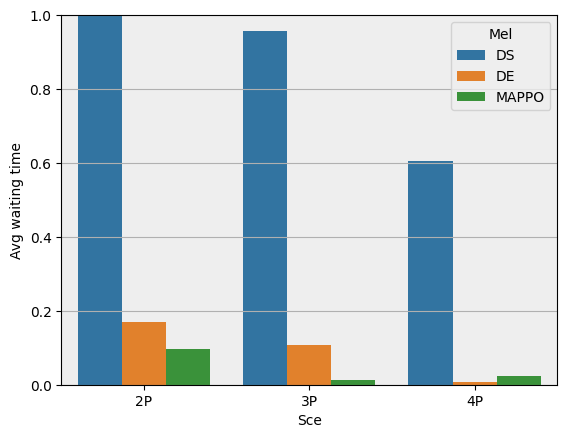

In [153]:
# ax1 = sns.barplot(y="WC", x='Sce', hue='Mel', data=df_waiting_charging, errorbar=('ci', 0), palette='Blues')
ax2 = sns.barplot(y="Waiting_time", x='Sce', hue='Mel', data=df_waiting_charging, errorbar=('ci', 0))
ax2.set_ylim(0, 1)
ax2.set_ylabel('Avg waiting time')
plt.savefig('Waiting_time.png', dpi=300)

In [154]:
num_cs = env.num_cs

In [155]:
all_waiting_num = {}
all_waiting_time = {}

for sce in ['2P', '3P', '4P']:
    dir_ds = 'output/LS1_DS_{}'.format(sce)
    dir_de = 'output/LS1_De_{}'.format(sce)
    dir_mappo = 'output/LS1_MAPPO_{}'.format(sce)

    df_cs_ds = pd.read_csv(dir_ds+'/CS.csv')
    df_cs_de = pd.read_csv(dir_de+'/CS.csv')
    df_cs_mappo = pd.read_csv(dir_mappo+'/CS.csv')

    ds_waiting_num = []
    ds_waiting_time = []
    for i in range(num_cs):
        c1 = 'CS{}_waiting_num'.format(i)
        c2 = 'CS{}_waiting_time'.format(i)
        ds_waiting_num.append(max(df_cs_ds[c1]))
        ds_waiting_time.append(max(df_cs_ds[c2]))
        # ds_waiting_num.append(df_cs_ds[c1].mean())
        # ds_waiting_time.append(df_cs_ds[c2].mean())

    de_waiting_num = []
    de_waiting_time = []
    for i in range(num_cs):
        c1 = 'CS{}_waiting_num'.format(i)
        c2 = 'CS{}_waiting_time'.format(i)
        de_waiting_num.append(max(df_cs_de[c1]))
        de_waiting_time.append(max(df_cs_de[c2]))
        # de_waiting_num.append(df_cs_de[c1].mean())
        # de_waiting_time.append(df_cs_de[c2].mean())
        
    mappo_waiting_num = []
    mappo_waiting_time = []
    for i in range(num_cs):
        c1 = 'CS{}_waiting_num'.format(i)
        c2 = 'CS{}_waiting_time'.format(i)
        mappo_waiting_num.append(max(df_cs_mappo[c1]))
        mappo_waiting_time.append(max(df_cs_mappo[c2]))
        # mappo_waiting_num.append(df_cs_mappo[c1].mean())
        # mappo_waiting_time.append(df_cs_mappo[c2].mean())
        
    waiting_num = [
        ds_waiting_num, de_waiting_num, mappo_waiting_num
    ]
    waiting_time = [
        ds_waiting_time, de_waiting_time, mappo_waiting_time
    ]
    
    all_waiting_num[sce] = waiting_num
    all_waiting_time[sce] = waiting_time

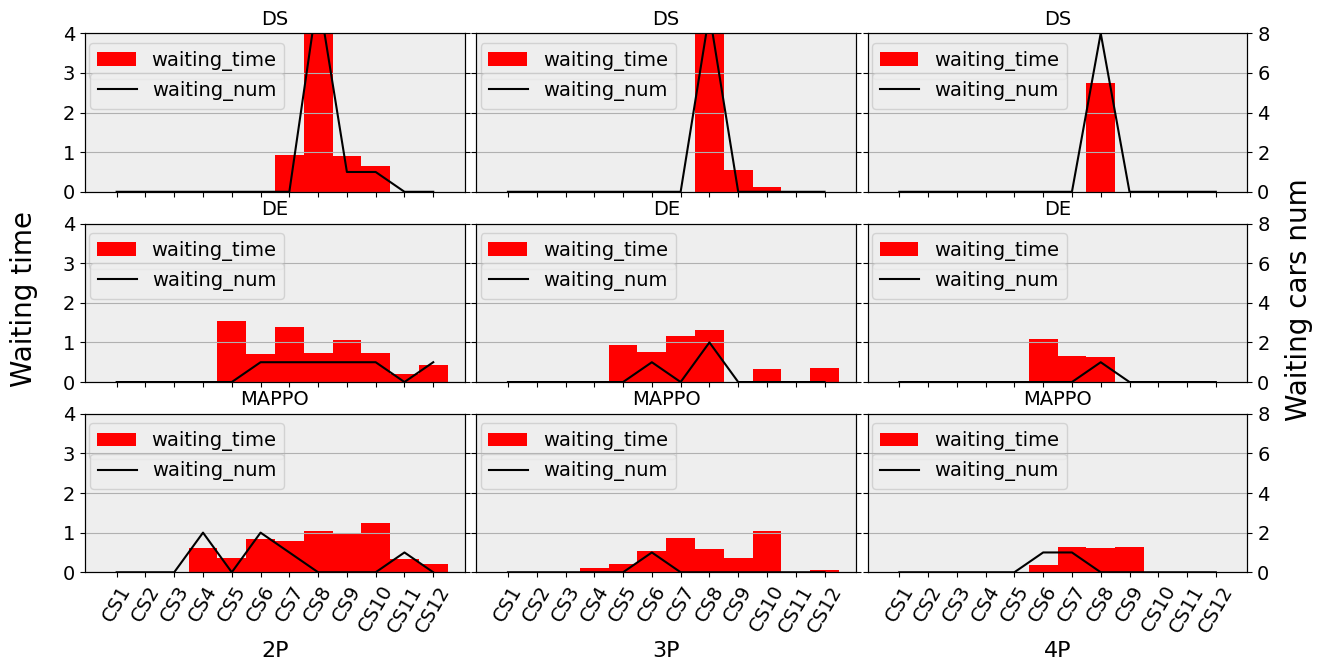

In [156]:
cs_id = ['CS{}'.format(i) for i in range(1, num_cs+1)]
rcParams['axes.grid'] = False
waiting_num = [
    ds_waiting_num, de_waiting_num, mappo_waiting_num
]
waiting_time = [
    ds_waiting_time, de_waiting_time, mappo_waiting_time
]

fig, axs = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15, 7))

for j, s in enumerate(['2P', '3P', '4P']):
    waiting_num = all_waiting_num[s]
    waiting_time = all_waiting_time[s]
    for i, m in enumerate(['DS', 'DE', 'MAPPO']):
        ax1 = axs[i][j]
        ax1.bar(
            cs_id, waiting_time[i], label='waiting_time',
            color='red', width=1,
            )
        # ax1.set_ylabel('Waiting time')
        ax1.set_ylim(0, 4)
        ax1.legend(bbox_to_anchor=(0.55, 1.0), fontsize=14)

        ax2 = ax1.twinx()
        ax2.plot(
            cs_id, waiting_num[i], label='waiting_num',
            color='black',
            )
        # ax2.set_ylabel('Waiting cars num')
        ax2.set_ylim(0, 8)
        if j != 2:
            ax2.yaxis.set_ticklabels([])
        ax2.legend(bbox_to_anchor=(0.55, 0.81), fontsize=14) # 图例位置
        
        ax1.set_title(m, fontsize=14) # 算法名小标题
        if i == 2:
            ax1.set_xlabel(s, fontsize=16) # 场景名
        # plt.legend()
        
        ax1.tick_params(
            axis='y',
            labelsize=14,
            )
        ax1.tick_params(
            axis='x',
            labelsize=14,
            labelrotation=60
            )
        ax2.tick_params(
            axis='y',
            labelsize=14,
            )
        plt.grid()

fig.text(0.075, 0.5, 'Waiting time', va='center', rotation='vertical', fontsize=20)
fig.text(0.925, 0.5, 'Waiting cars num', va='center', rotation='vertical', fontsize=20)
# plt.xlabel('CS')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0.2) # 间距
plt.savefig('CS_waiting.png', dpi=300, bbox_inches='tight')
plt.show()

In [157]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("WR", ["#eeeeee", "red"])

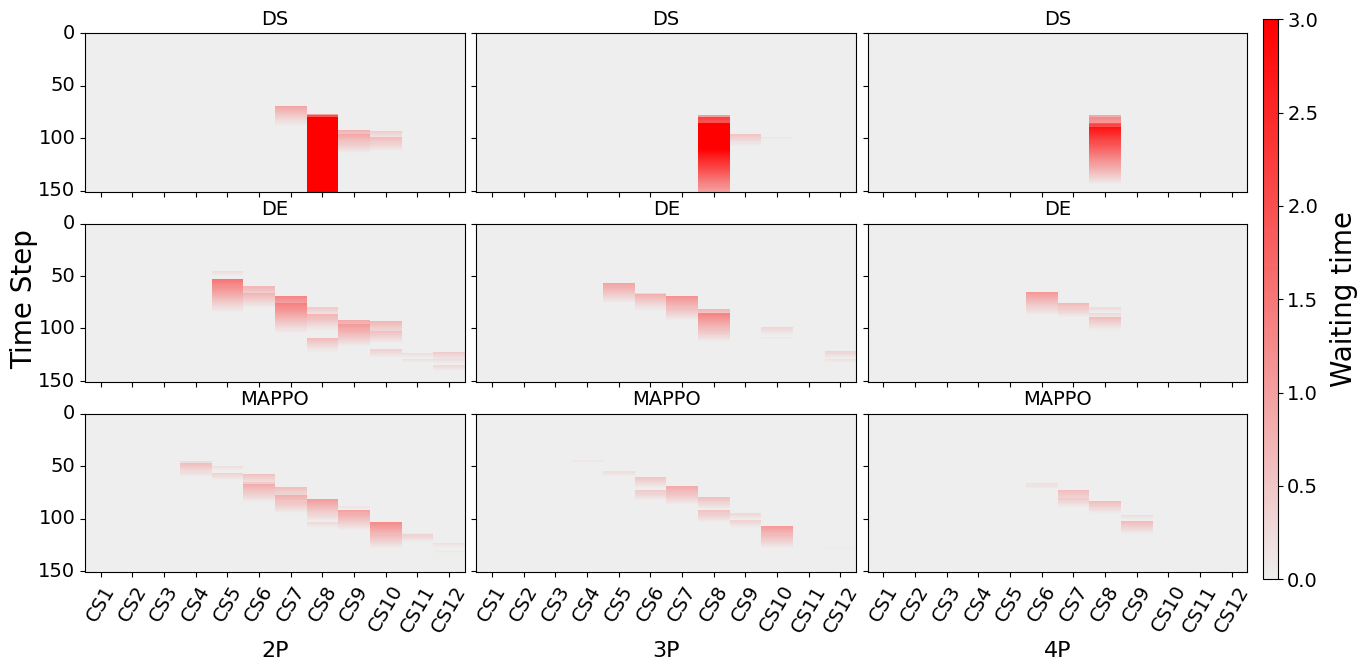

In [158]:
sce = ['2P', '3P', '4P']
mal = ['DS', 'DE', 'MAPPO']

fig, axs = plt.subplots(3, 3, figsize=(15, 7), sharex='col', sharey='row')
for j, s in enumerate(sce):
    for i, m in enumerate(mal):
        dir = 'output/LS1_{}_{}'.format(m, s)
        df_cs = pd.read_csv(dir+'/CS.csv')
        waiting_time = np.array(df_cs[['CS{}_waiting_time'.format(id) for id in range(num_cs)]])
        zero_m = np.zeros_like(waiting_time)
        waiting_time = np.concatenate((waiting_time, zero_m), axis=0)[:151]
        
        ax = axs[i][j]
        sns.heatmap(
            waiting_time, 
            ax=ax, cmap=cmap, vmin=0, vmax=3,
            cbar=False
            )
        ax.xaxis.set_ticklabels(['CS{}'.format(id) for id in range(1, num_cs+1)])
        ax.set_title(m, fontsize=14)
        if i == 2:
            ax.set_xlabel(s, fontsize=16)
        # # ax.yaxis.set_ticklabels(list(df_cs['time']))
        # # ax.yaxis.set_major_locator(plt.MultipleLocator(150))
        ax.set_yticks(range(0, 151, 50))
        ax.set_yticklabels(range(0, 151, 50))
        # ax.set_ylim(200, 0)
        ax.spines['left'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.tick_params(
            axis='y',
            labelsize=14,
            )
        ax.tick_params(
            axis='x',
            labelsize=14,
            labelrotation=60
            )
        # plt.grid()
        
fig.text(0.075, 0.5, 'Time Step', va='center', rotation='vertical', fontsize=20)
fig.text(0.955, 0.5, 'Waiting time', va='center', rotation='vertical', fontsize=20)
cb_ax = fig.add_axes([0.91, 0.1, 0.01, 0.8])  # type: ignore # 位置参数需要根据情况调整
cb = fig.colorbar(ax.collections[0], cax=cb_ax)
cb.ax.tick_params(labelsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0.2)
plt.savefig('hotmap.png', dpi=300, bbox_inches='tight')
plt.show()